In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy import geocoders
from geopy.geocoders import GoogleV3
import gmaps
import gmaps.datasets

GOOGLE_API = #API Key

g = GoogleV3(api_key=GOOGLE_API)

pd.options.mode.chained_assignment = None  # default='warn'

data_path = "data/"

In [2]:
#Load Data

df_nyc_res = pd.read_csv(data_path + "nycrRestaurantData.csv")
df_nyc_res.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [3]:
valid_grade_list = ['A', 'C', 'B', 'P', 'Z'] #df_nyc_res["GRADE"].unique()
valid_boro_list = ["MANHATTAN", "BROOKLYN", "QUEENS", "STATEN ISLAND", "BRONX"] #df_nyc_res["BORO"].unique()

In [4]:
# Clean Data

df_nyc_res.loc[~pd.isnull(df_nyc_res["GRADE"]), "GRADE"] #Gets rid of nulls
df_nyc_res_valid = df_nyc_res.loc[df_nyc_res["GRADE"].isin(valid_grade_list)] #Gets the legit null points

df_nyc_res_valid["Address"] = df_nyc_res_valid["BUILDING"] + " " + df_nyc_res_valid["STREET"] + ", " + df_nyc_res_valid["BORO"]

In [5]:
df_nyc_res_valid["GRADE"].unique()

array(['A', 'C', 'B', 'P', 'Z'], dtype=object)

In [6]:
df_SI_res_valid = df_nyc_res_valid[df_nyc_res_valid["BORO"] == "STATEN ISLAND"] #Get Data in Staten Island
df_SI_res_B_valid = df_SI_res_valid[df_SI_res_valid["GRADE"] == "B"]

latList = []
longList = []

test = df_SI_res_B_valid[:300]

In [7]:
for address in test["Address"]:
    try: #Get Lat & Long Based on their Address
        location = g.geocode(address, timeout=15)
        #print (location.latitude,location.longitude)
        latList.append(location.latitude)
        longList.append(location.longitude)
    except: #If reached Google Limit - just replace with 0's
        latList.append(0)
        longList.append(0)

In [8]:
#Store Lat & Long into the df
test["Latitude"] = pd.Series(latList).values
test["Longitude"] = pd.Series(longList).values 

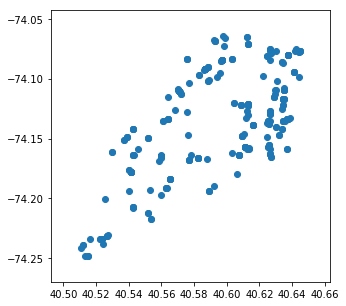

In [9]:
#Plot a heat map of the Lat & Long
plt.figure(figsize=(5, 5))

plt.scatter(test["Latitude"], test["Longitude"])
plt.show()

In [10]:
loc = np.array(list(zip(test["Latitude"], test["Longitude"])))

In [11]:
#Plot a Google HeatMap
gmaps.configure(api_key=GOOGLE_API)


fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(loc))
fig

A Jupyter Widget

In [12]:
df_boro_grade = df_nyc_res_valid[["BORO", "GRADE"]] 

df_boro_grade.groupby(["BORO", "GRADE"]).size()

BORO           GRADE
BRONX          A        13538
               B         2690
               C          675
               P          168
               Z          315
BROOKLYN       A        37137
               B         6453
               C         1593
               P          507
               Z          961
MANHATTAN      A        61103
               B         9942
               C         2687
               P          599
               Z         1274
Missing        A            4
QUEENS         A        35534
               B         6007
               C         1477
               P          388
               Z          969
STATEN ISLAND  A         5320
               B          980
               C          209
               P           56
               Z           81
dtype: int64

In [13]:
def showBoroughBar(boro):
    graph_title = boro + " Grade Data"
    df_boro_graph = df_boro_grade[df_boro_grade["BORO"]==boro].groupby(["BORO", "GRADE"]).size() 
    ax = df_boro_graph.plot(kind='bar', title= graph_title, rot=0 )

    ax.set_xticklabels(valid_grade_list)
    
    plt.show()

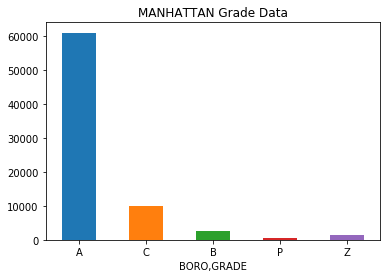

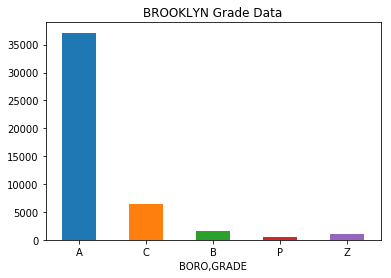

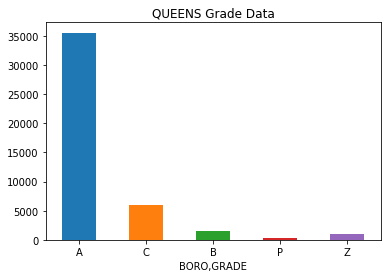

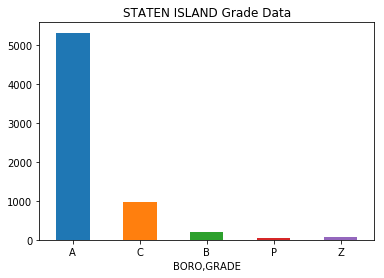

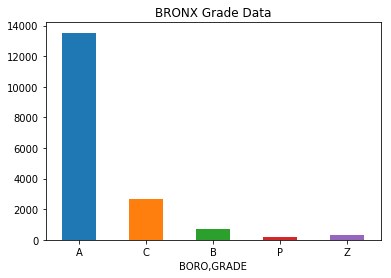

In [14]:
for boro in valid_boro_list:
    showBoroughBar(boro)

In [15]:
cusine_group = df_nyc_res_valid.groupby(["CUISINE DESCRIPTION"]).size()

cusine_group_gt_1000 = cusine_group[cusine_group > 1000]

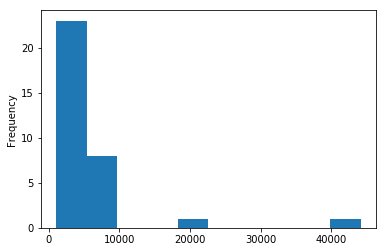

In [16]:
cusine_group_gt_1000.plot(kind="hist")
plt.show()

In [17]:
cusine_group_gt_1000_list = cusine_group_gt_1000.index
df_filtered_cusine = df_nyc_res_valid.loc[df_nyc_res["CUISINE DESCRIPTION"].isin(cusine_group_gt_1000_list)] #aGets the legit null points

In [18]:
def showCuisinieGrade(grade):
    graph_title = grade + " x Cuisine"
    df_boro_graph = df_filtered_cusine[df_filtered_cusine["GRADE"]==grade].groupby(["GRADE", "CUISINE DESCRIPTION"]).size().sort_values(ascending=False)[:10]
    
    cuisine_xticks = []
    for cuisine in df_boro_graph.index:
        cuisine_xticks.append(cuisine[1][:10])
        
    ax = df_boro_graph.plot(kind='bar', title=graph_title)
    
    ax.set_xticklabels(cuisine_xticks)
    
    plt.show()

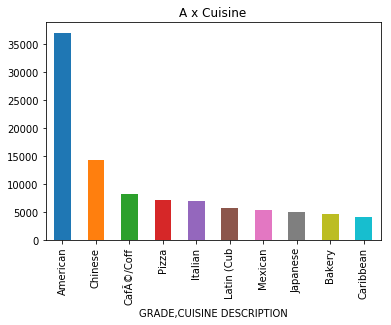

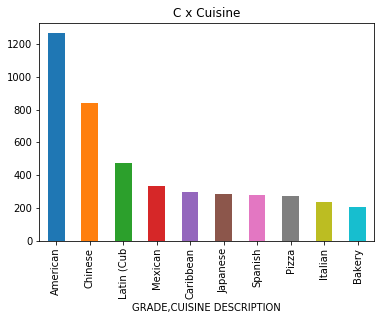

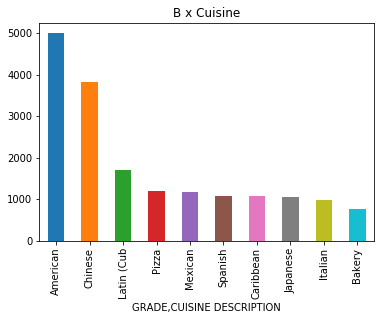

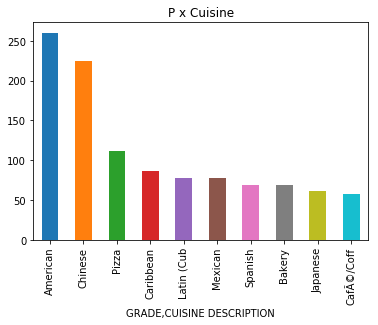

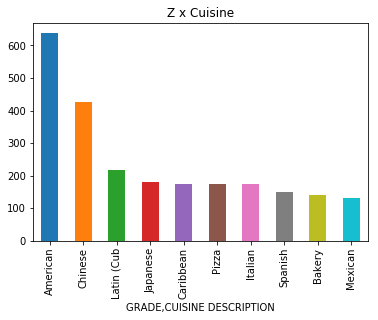

In [19]:
for grade in valid_grade_list:
    showCuisinieGrade(grade)